# Vader

In [1]:
# Uncomment and run this cell if the relative imports are not working
import sys
sys.path.append('..')

In [2]:
%matplotlib inline

from utils.db_client import DBClient
from utils.vader import VADER_Analyzer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
topics = ['budget', 'civil_rights', 'courts', 'criminal_justice', 'drugs', 
          'econ_inequality', 'econ_jobs', 'education', 'environment', 'family',
          'foreign_policy', 'governance', 'guns', 'health', 'immigration', 
          'military', 'public_safety', 'puerto_rico', 'race', 'rural', 
          'russia', 'sexual_assault', 'shutdown', 'social_security', 'taxes', 
          'technology', 'women_rights']


budget
I'm trying
Connected to political tweets DB
AxesSubplot(0.125,0.125;0.775x0.755)
civil_rights
I'm trying
Connected to political tweets DB
AxesSubplot(0.125,0.125;0.775x0.755)
courts
I'm trying
Connected to political tweets DB
AxesSubplot(0.125,0.125;0.775x0.755)
criminal_justice
I'm trying
Connected to political tweets DB
AxesSubplot(0.125,0.125;0.775x0.755)
drugs
I'm trying
Connected to political tweets DB
AxesSubplot(0.125,0.125;0.775x0.755)
econ_inequality
I'm trying
Connected to political tweets DB
AxesSubplot(0.125,0.125;0.775x0.755)
econ_jobs
I'm trying
Connected to political tweets DB


KeyboardInterrupt: 

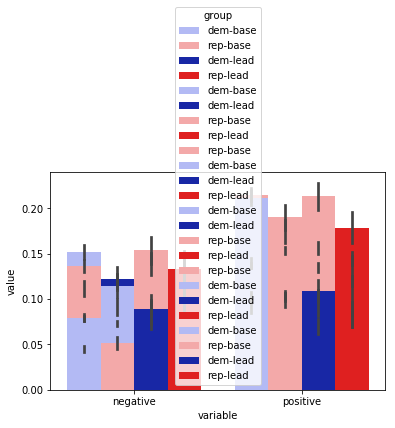

In [7]:
for topic in topics:
    plot = None
#topic = 'budget'
    print(topic)
    d = VADER_Analyzer(topic)
    d.get_data()
    d.run_vader()
    d.outcome_by_group()
    d.results_for_plotting()
    plot = d.plot()
    print(plot)
    

In [ ]:
d.df

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
db = DBClient(secrets_path = "../configs/db_secrets.json")

In [ ]:
data_query = """
SELECT tweet_id, tweet_date, tweet_text_raw, user_id, democrat, leadership
from staging.master
where {} = true
"""

In [ ]:
tweets = pd.DataFrame(db.read(data_query.format("drugs"))).rename(columns={0: "tweet_id", 
                                                                           1: "tweet_date",
                                                                           2: "tweet_text_raw",
                                                                           3: "user_id",
                                                                           4: "democrat", 
                                                                           5: "leadership"})
#tweet_text = [tweet[0][0] for tweet in tweets]

In [ ]:
tweets['negative'] = None
tweets['neutral'] = None
tweets['positive'] = None
tweets['compound'] = None
tweets

In [ ]:
#nltk.download()
sid = SentimentIntensityAnalyzer()

In [ ]:
tweets.iloc(1,)['negative']

In [ ]:
for index, row in tweets.iterrows():
    tweet_text = row['tweet_text_raw']
    ss = sid.polarity_scores(tweet_text)
    tweets.at[index, 'negative'] = ss['neg']
    tweets.at[index, 'neutral'] = ss['neu']
    tweets.at[index, 'positive'] = ss['pos']
    tweets.at[index, 'compound'] = ss['compound']

In [ ]:
tweets

In [ ]:
tweets.groupby(['democrat','leadership'], as_index=False).agg(
                      {'negative':['mean','std'],
                       'neutral':['mean','std'],
                       'positive':['mean','std']
                      })

In [ ]:
tweets['negative'] = tweets['negative'].astype(float)
tweets['positive'] = tweets['positive'].astype(float)
tweets['neutral'] = tweets['neutral'].astype(float)
tweets['compound'] = tweets['compound'].astype(float)
p = tweets.groupby(['democrat','leadership'], as_index=False).agg(
                      {'negative':['mean','std'],
                       'neutral':['mean','std'],
                       'positive':['mean','std'],
                       'compound':['mean','std']
                      })

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
p

In [ ]:
conditions = [
               (p['democrat'] == True) & (p['leadership'] == True),
               (p['democrat'] == True) & (p['leadership'] == False),
               (p['democrat'] == False) & (p['leadership'] == True),
               (p['democrat'] == False) & (p['leadership'] == False)
              ]
choices = ['dem-lead', 'dem-base', 'rep-lead', 'rep-base']

results_to_plot = pd.melt(p, id_vars = ['democrat', 'leadership'])

results_to_plot['group'] = np.where(
    (results_to_plot['democrat']==True) & (results_to_plot['leadership']==True), 'dem-lead', 
np.where(
    (results_to_plot['democrat']==True) & (results_to_plot['leadership']==False), 'dem-base',
np.where(
    (results_to_plot['democrat']==False) & (results_to_plot['leadership']==True), 'rep-lead', 'rep-base')))

#results_to_plot['group'] = np.select(conditions, choices)
results_to_plot

In [ ]:
sns.barplot(x = 'variable_0', y = 'value', hue = 'group', data=results_to_plot)

In [ ]:
p.columns

In [ ]:
p

In [ ]:
results_to_plot